# Packagae Importing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

# Data Exploration

In [2]:
df = pd.read_csv("data/data.csv")
df.head(5)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


# Preprocessing

In [3]:
missing_data = df.isnull().sum()
print(missing_data)

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

# Visualization

<AxesSubplot:xlabel='Suggested Job Role', ylabel='count'>

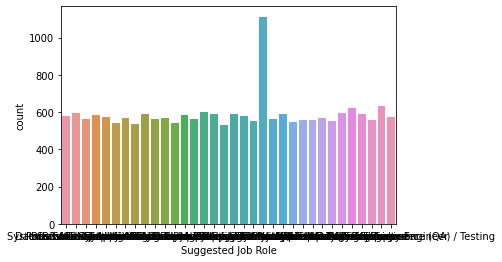

In [4]:
import seaborn as sns
sns.countplot(x="Suggested Job Role", data = df)

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


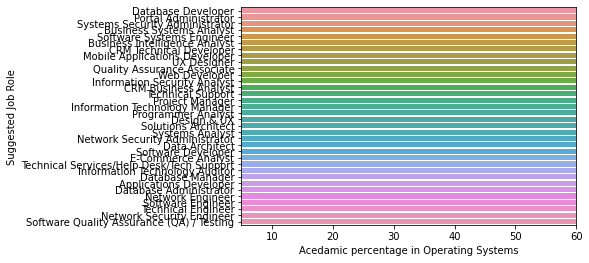

In [5]:
sns.barplot( df['Acedamic percentage in Operating Systems'],df['Suggested Job Role'])
plt.xlim(5,60)
plt.show()

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [7]:
df.drop(['memory capability score', 'Interested subjects','interested career area ','Job/Higher Studies?','Type of company want to settle in?','Taken inputs from seniors or elders','interested in games','Interested Type of Books','Salary Range Expected','In a Realtionship?','Gentle or Tuff behaviour?','Salary/work','hard/smart worker','worked in teams ever?'], axis=1, inplace=True)

In [8]:
df['reading and writing skills'].unique()

array(['excellent', 'poor', 'medium'], dtype=object)

In [9]:
df['Suggested Job Role'] = df['Suggested Job Role'].replace({'Database Developer': 0, 'Technical Support': 0, 'Business Intelligence Analyst': 0, 'Business Systems Analyst': 0, 'Portal Administrator': 0, 'Data Architect': 0,'Systems Security Administrator': 1, 'CRM Technical Developer': 1, 'Software Systems Engineer': 1, 'Mobile Applications Developer': 1, 'UX Designer': 1, 'Quality Assurance Associate': 1,'Web Developer': 2, 'Information Security Analyst': 2, 'CRM Business Analyst': 2, 'Project Manager': 2, 'Information Technology Manager': 2, 'Programmer Analyst': 2,'Design & UX': 3, 'Solutions Architect': 3, 'Systems Analyst': 3, 'Network Security Administrator': 3, 'Data Architect': 3, 'Software Developer': 3,'E-Commerce Analyst': 4, 'Technical Services/Help Desk/Tech Support': 4, 'Information Technology Auditor': 4, 'Database Manager': 4, 'Applications Developer': 4, 'Database Administrator': 4,'Network Engineer': 5, 'Software Engineer': 5, 'Technical Engineer': 5, 'Network Security Engineer': 5,'Software Quality Assurance (QA) / Testing': 5})

In [10]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [11]:
df['can work long time before system?']= label_encoder.fit_transform(df['can work long time before system?'])
df['self-learning capability?']= label_encoder.fit_transform(df['self-learning capability?'])
df['Extra-courses did']= label_encoder.fit_transform(df['Extra-courses did'])
df['certifications']= label_encoder.fit_transform(df['certifications'])
df['workshops']= label_encoder.fit_transform(df['workshops'])
df['talenttests taken?']= label_encoder.fit_transform(df['talenttests taken?'])
df['olympiads']= label_encoder.fit_transform(df['olympiads'])
df['reading and writing skills']= label_encoder.fit_transform(df['reading and writing skills'])
df['Management or Technical']= label_encoder.fit_transform(df['Management or Technical'])
df['Introvert']= label_encoder.fit_transform(df['Introvert'])

In [12]:
df['can work long time before system?'].unique()
df['self-learning capability?'].unique()
df['Extra-courses did'].unique()
df['certifications'].unique()
df['workshops'].unique()
df['talenttests taken?'].unique()
df['olympiads'].unique()
df['reading and writing skills'].unique()
df['Management or Technical'].unique()
df['Introvert'].unique()

array([0, 1])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Acedamic percentage in Operating Systems  20000 non-null  int64
 1   percentage in Algorithms                  20000 non-null  int64
 2   Percentage in Programming Concepts        20000 non-null  int64
 3   Percentage in Software Engineering        20000 non-null  int64
 4   Percentage in Computer Networks           20000 non-null  int64
 5   Percentage in Electronics Subjects        20000 non-null  int64
 6   Percentage in Computer Architecture       20000 non-null  int64
 7   Percentage in Mathematics                 20000 non-null  int64
 8   Percentage in Communication skills        20000 non-null  int64
 9   Hours working per day                     20000 non-null  int64
 10  Logical quotient rating                   20000 non-null  

In [14]:
print(df.shape)

(20000, 25)


# Feature Selection

In [15]:
X = df.iloc[:, 0:24]
y = df.iloc[:,24]

# Data Splitting & Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [18]:
import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

In [19]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Machine Learning

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[ 50 135 131 256  91  48]
 [ 55 169 149 314 137  57]
 [ 66 149 134 319 123  57]
 [ 72 173 179 323 130  79]
 [ 57 158 163 302 131  57]
 [ 57 116 142 291  85  45]]


In [22]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.5476772616136919
17.04
22.831050228310502
71.05263157894737


# Voting Classifier

In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[126 180 125 205  57  18]
 [156 214 167 256  65  23]
 [157 208 139 256  61  27]
 [176 237 182 275  69  17]
 [160 206 161 246  76  19]
 [138 168 141 228  34  27]]


In [23]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) * 100
print(val2)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.5473372781065089
17.14
37.05882352941177
53.57142857142857


# Decision Tree Classifier

In [24]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[ 99 124 113 158 119  98]
 [119 144 163 173 145 137]
 [127 143 147 167 133 131]
 [132 151 189 195 148 141]
 [130 139 148 177 149 125]
 [102 121 121 156 114 122]]


In [25]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 100
print(val3)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

0.5411522633744856
17.119999999999997
40.74074074074074
51.028806584362144


# Accuracy Comparsion

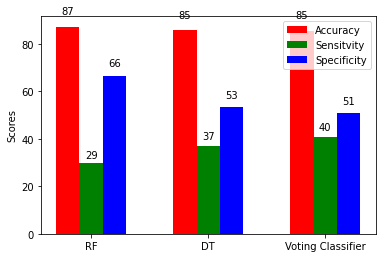

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1*5,val2*5,val3*5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity,VOT_sensitivity,DT_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity,VOT_specificity,DT_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('RF','DT','Voting Classifier') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Model Building

In [23]:
import joblib
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']